# Алгоритм Дейкстры для поиска кратчайшего пути

In [49]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import sys

In [32]:
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.nodes)
 
    # Мы будем использовать этот словарь, чтобы сэкономить на посещении каждого узла и обновлять его по мере продвижения по графику 
    shortest_path = {}
 
    # Мы будем использовать этот dict, чтобы сохранить кратчайший известный путь к найденному узлу
    previous_nodes = {}
 
    # Мы будем использовать max_value для инициализации значения "бесконечности" непосещенных узлов   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # Однако мы инициализируем значение начального узла 0  
    shortest_path[start_node] = 0
    
    # Алгоритм выполняется до тех пор, пока мы не посетим все узлы
    while unvisited_nodes:
        # Приведенный ниже блок кода находит узел с наименьшей оценкой
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # Приведенный ниже блок кода извлекает соседей текущего узла и обновляет их расстояния
        neighbors = graph.neighbors(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph[current_min_node][neighbor]['weight']
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # После посещения его соседей мы отмечаем узел как "посещенный"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
   # Добавить начальный узел вручную
    path.append(start_node)
    
    print("\n\nНайден следующий лучший маршрут с ценностью {}.\n".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))
    return tuple(reversed(path))

## Окно ввода данных

In [ ]:
#Москва Посад 3, Москва Рязань 4, Посад Йошкар-Ола 10, Посад Владимир 5, Рязань Владимир 2,Рязань Нижний 3, Владимир Йошкар-Ола 5, Владимир Нижний 1, Нижний Йошкар-Ола 6

In [ ]:
# Москва Минск 8, Москва Харьков 9.5, Минск Киев 7, Минск Люблин 6.5, Харьков Киев 6, Киев Люблин 8.5, Киев Будапешт 15, Люблин Будапешт 9.5

In [42]:
vvod = int(input('Выберите способ ввода данных: 1 - ввод вручную, 2-импорт из csv файла '))
if vvod == 2:
    input_data = pd.read_csv('test.csv', index_col=0, sep = ';', decimal=",")
    G = nx.Graph(input_data.astype(float).values)
    G = nx.relabel_nodes(G, {i:val for i, val in enumerate(input_data.columns)})
elif vvod ==1:
    input_ = input("Введите вершину выхода, вершину входа, вес через пробел, след блок отделив запятой: ")
    edges = [{from_: {to_: float(weight)}} for i in input_.split(', ') for from_, to_, weight in [i.split()]]
    edges_list = [(key, k, v) for i in edges for key, val in i.items() for k, v in val.items()]
    G = nx.Graph()
    G.add_weighted_edges_from(edges_list)
else:
    print('Введен неверный параметр')

Выберите способ ввода данных: 1 - ввод вручную, 2-импорт из csv файла 1
Введите вершину выхода, вершину входа, вес через пробел, след блок отделив запятой: Москва Минск 8, Москва Харьков 9.5, Минск Киев 7, Минск Люблин 6.5, Харьков Киев 6, Киев Люблин 8.5, Киев Будапешт 15, Люблин Будапешт 9.5


## Ответ:

In [43]:
start_node=input("Введите точку отправления: ")
graph = G
previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, 
                                                   start_node=start_node)

path = print_result(previous_nodes, shortest_path, 
                    start_node=start_node, 
                    target_node=input("Введите точку прибытия: "))

Введите точку отправления: Москва
Введите точку прибытия: Будапешт


Найден следующий лучший маршрут с ценностью 24.0.

Москва -> Минск -> Люблин -> Будапешт


In [44]:
# Матрица смежности
nx.to_numpy_matrix(G)

matrix([[ 0. ,  8. ,  9.5,  0. ,  0. ,  0. ],
        [ 8. ,  0. ,  0. ,  7. ,  6.5,  0. ],
        [ 9.5,  0. ,  0. ,  6. ,  0. ,  0. ],
        [ 0. ,  7. ,  6. ,  0. ,  8.5, 15. ],
        [ 0. ,  6.5,  0. ,  8.5,  0. ,  9.5],
        [ 0. ,  0. ,  0. , 15. ,  9.5,  0. ]])

# Визуализация

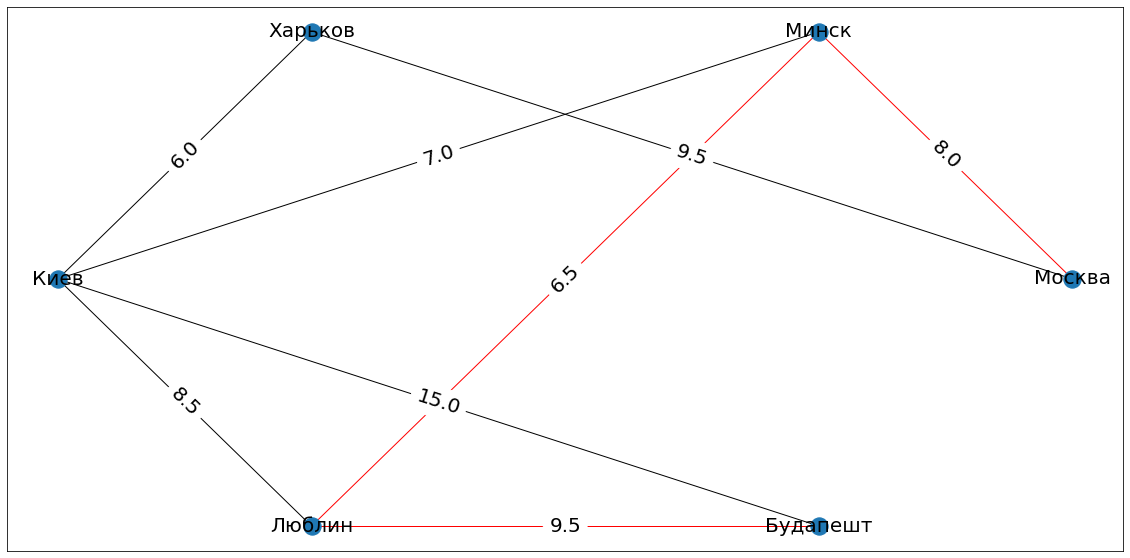

In [45]:
plt.figure(1, figsize=(20, 10))
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos=pos)
labels = nx.get_edge_attributes(G, 'weight')
red_edges = set(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos=pos, edgelist=red_edges, 
                       edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=(set(G.edges) - set(red_edges)),
                       arrows=False)
nx.draw_networkx_labels(G, pos=pos, font_size=20)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, font_size=20)
plt.show()